# Linear models: Logistic Regression and SVM

### 1- Logistic Regression

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
print(iris.keys())
X = iris.data
y = iris.target


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.25, random_state = 0) ##Keep class proportions via the stratify term
scaler = StandardScaler().fit(X_train) #Fit a scaler for 
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
logreg = LogisticRegression() #Create logistic regression model
logreg.fit(X_train_transform,y_train) #Train model
y_preds = logreg.predict(X_test_transform) #Predict values with model
print('Accuracy of test_set : {:2f}%'.format(accuracy_score(y_test,y_preds)* 100))

Accuracy of test_set : 97.368421%


In [4]:
y_proba = logreg.predict_proba(X_test_transform)

In [5]:
(y_proba[:15] * 100).astype(int)

array([[97,  2,  0],
       [94,  5,  0],
       [98,  1,  0],
       [93,  6,  0],
       [ 3, 94,  1],
       [ 2, 85, 11],
       [ 4, 88,  7],
       [95,  4,  0],
       [ 6, 68, 24],
       [ 0, 32, 67],
       [ 0,  1, 98],
       [ 0, 20, 79],
       [ 3, 93,  2],
       [ 0, 21, 78],
       [ 2, 89,  8]])

In [6]:
##Regularization
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train_transform,y_train)
    y_preds = lr.predict(X_test_transform)
    print('Accuracy at C = {} : {:2f}%'.format(C_value,accuracy_score(y_test,y_preds)* 100))
    

Accuracy at C = 0.001 : 73.684211%
Accuracy at C = 0.01 : 78.947368%
Accuracy at C = 0.1 : 81.578947%
Accuracy at C = 1 : 97.368421%
Accuracy at C = 10 : 100.000000%
Accuracy at C = 100 : 100.000000%
Accuracy at C = 1000 : 100.000000%


### 2- SVM

In [7]:
from sklearn.svm import SVC

In [8]:
SVM = SVC()
SVM.fit(X_train_transform, y_train)
y_preds_SVM = SVM.predict(X_test_transform)
print('Accuracy of test_set : {:2f}%'.format(accuracy_score(y_test,y_preds_SVM)* 100))

Accuracy of test_set : 97.368421%


In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds_SVM)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  1 11]]


# Tree-based Models: Decision trees, Random forest

### 1- Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_preds_dt = dt.predict(X_test)
print('Accuracy of test_set : {:2f}%'.format(accuracy_score(y_test,y_preds_dt)* 100))

Accuracy of test_set : 94.736842%


In [11]:
for d in range(1,6):
    dt = DecisionTreeClassifier(max_depth=d,min_samples_split = 0.03)
    dt.fit(X_train,y_train)
    y_preds_dt = dt.predict(X_test)
    print('Accuracy at depth = {} : {:2f}%'.format(d,accuracy_score(y_test,y_preds_dt)* 100))

Accuracy at depth = 1 : 65.789474%
Accuracy at depth = 2 : 94.736842%
Accuracy at depth = 3 : 94.736842%
Accuracy at depth = 4 : 97.368421%
Accuracy at depth = 5 : 97.368421%
Accuracy at depth = 6 : 97.368421%
Accuracy at depth = 7 : 97.368421%
Accuracy at depth = 8 : 97.368421%
Accuracy at depth = 9 : 97.368421%


In [12]:
##DecisionTreeRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_diabetes
data = load_diabetes()
X , y = data.data , data.target
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0) 
dt_r =  DecisionTreeRegressor()
dt_r.fit(X_train,y_train)
y_preds = dt_r.predict(X_test)
RMSE = MSE(y_test,y_preds) ** 0.5 # Root mean squared error
print(RMSE)


(442, 10)
76.58393499356833


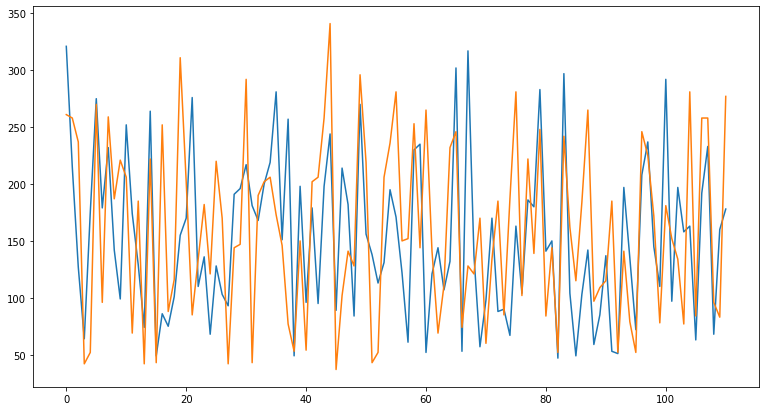

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.plot(range(len(X_test)),y_test)
plt.plot(range(len(X_test)),y_preds)
plt.show()

### 2- Random Forests

In [14]:
iris = datasets.load_iris()
print(iris.keys())
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.25, random_state = 0) ##Keep class proportions via the stratify term


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf_c = RandomForestClassifier(n_estimators=200)
rf_c.fit(X_train_transform,y_train)
y_preds_rf = rf_c.predict(X_test_transform)
print('Accuracy of test_set : {:2f}%'.format(accuracy_score(y_test,y_preds_rf)* 100))

Accuracy of test_set : 94.736842%


## Grid Searching HyperParameters

In [32]:
params = {'n_estimators':[30,50,100],
         'criterion':['entropy','gini']}
rf_c_CV = RandomForestClassifier()
grid_cv = GridSearchCV(estimator=rf_c_CV,param_grid=params,cv=5,scoring="accuracy")
grid_cv.fit(X_train_transform,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9466403162055336
{'criterion': 'entropy', 'n_estimators': 50}


In [33]:
best_model = grid_cv.best_estimator_
print('Accuracy of test_set : {:2f}%'.format(accuracy_score(y_test,best_model.predict(X_test_transform))* 100))


Accuracy of test_set : 97.368421%
